Loading fid n(z), which has 6 redshift bins


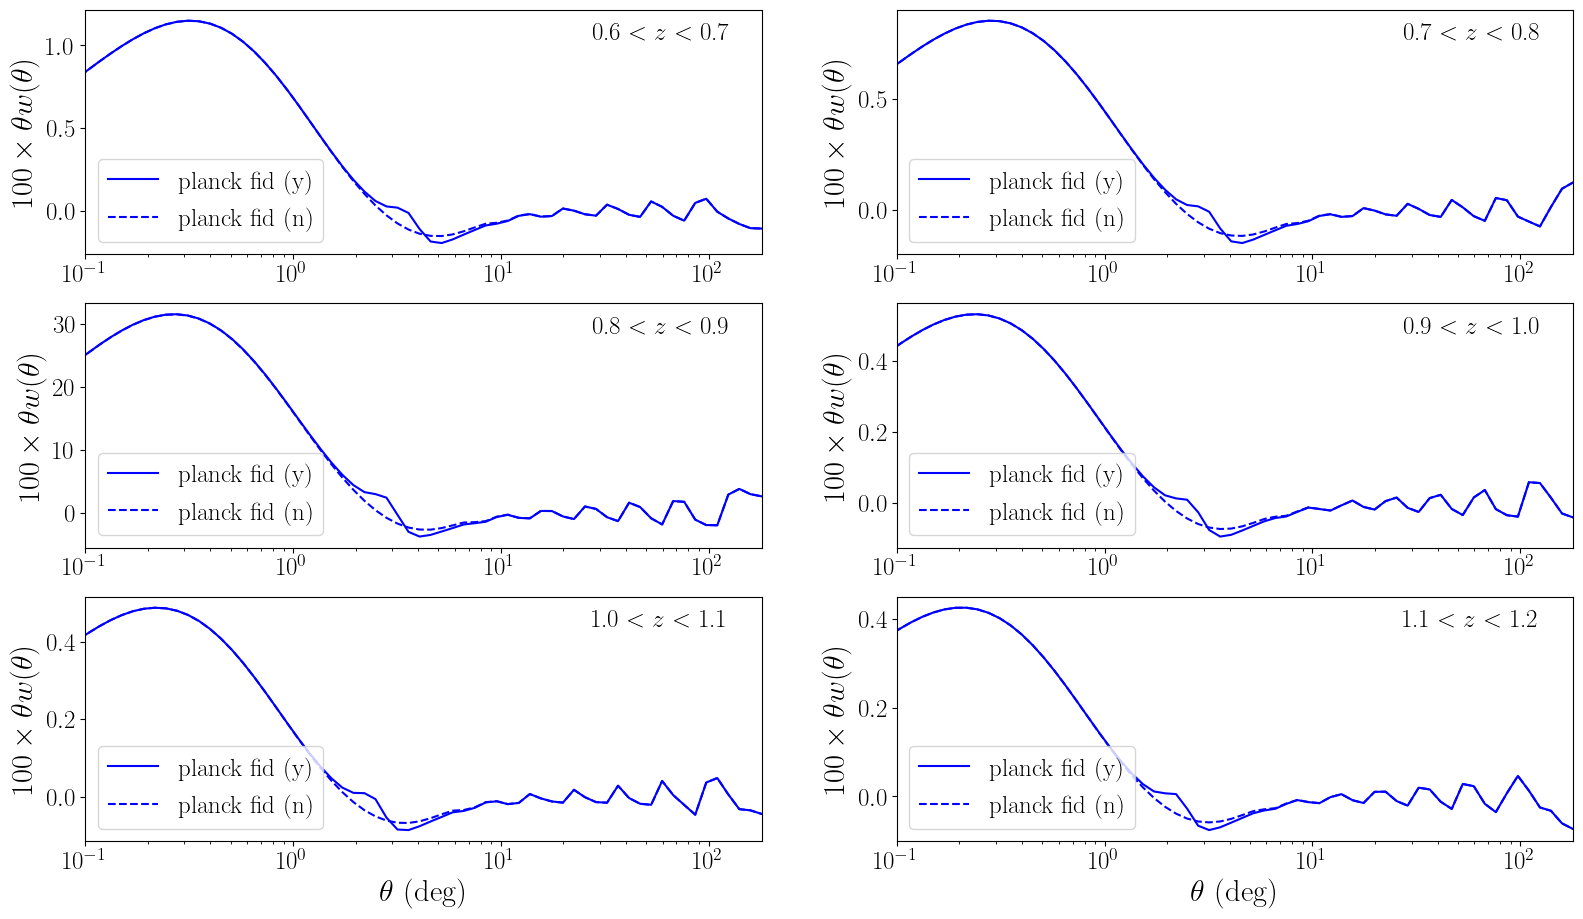

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

from utils import savedir_template, redshift_distributions

def load_wtheta_template(cosmology_template, bin_z, nz_flag, include_wiggles='y'):
    include_wiggles = '' if include_wiggles == 'y' else '_noBAO'
    wtheta_template = {}
    for suffix in ['bb', 'bf', 'ff']:
        loaddir = savedir_template(include_wiggles=include_wiggles, nz_flag=nz_flag, cosmology_template=cosmology_template, verbose=False)()
        file_path = os.path.join(loaddir, f'wtheta_{suffix}_bin{bin_z}.txt')
        data = np.loadtxt(file_path)
        theta = data[:, 0]
        wtheta_template[suffix] = data[:, 1]
    return theta, wtheta_template

galaxy_bias = {0: 1, 1: 1, 2: 10, 3: 1, 4: 1, 5: 1}

cosmology_templates = ['planck']
nz_flags = ['fid']

colors = {'fid': 'blue'}
nbins = {'fid': 6}
linestyle = {'y': '-', 'n': '--'}

plt.figure(figsize=(19.2, 10.8))

for cosmology_template in cosmology_templates:
    for nz_flag in nz_flags:
        
        z_edges = redshift_distributions(nz_flag).z_edges
        
        color = colors[nz_flag]
        nbins = nbins[nz_flag]

        wtheta = {}
        wtheta_bb = {}
        wtheta_bf = {}
        wtheta_ff = {}

        for bin_z in range(nbins):
            ax = plt.subplot(3, 2, bin_z + 1)
            
            for include_wiggles in ['y', 'n']:
                
                label = cosmology_template + ' ' + nz_flag + ' ('+include_wiggles+')'
            
                theta, wtheta_template = load_wtheta_template(cosmology_template, bin_z, nz_flag, include_wiggles)
                wtheta_bb[bin_z] = wtheta_template['bb']
                wtheta_bf[bin_z] = wtheta_template['bf']
                wtheta_ff[bin_z] = wtheta_template['ff']

                wtheta[bin_z] = galaxy_bias[bin_z] ** 2 * wtheta_bb[bin_z] + galaxy_bias[bin_z] * wtheta_bf[bin_z] + wtheta_ff[bin_z]

                ax.semilogx(theta * 180 / np.pi, 100 * (theta * 180 / np.pi) * wtheta[bin_z], label=label, color=color, linestyle=linestyle[include_wiggles])

            z_edge = z_edges[bin_z]
            if bin_z in [4, 5]:
                ax.set_xlabel(r'$\theta$ (deg)', fontsize=22)
            ax.set_ylabel(r'$100\times\theta w(\theta)$', fontsize=22)
            ax.set_xlim([10**-1, 180])
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)
            ax.text(0.85, 0.9, f'{z_edge[0]} $< z <$ {z_edge[1]}', ha='center', va='center', transform=ax.transAxes, fontsize=18)
            ax.legend(loc='lower left', fontsize=18)
